# Explore the word dictionary

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from string import ascii_lowercase

base_path = ".."
data_path = os.path.join(base_path, "data")

Load the words and add a `freq` field to measure frequency of words -- more useful than pure counts.

In [2]:
data = pd.read_csv(os.path.join(data_path, "unigram_freq.csv"))
data["freq"] = data["count"] / data["count"].sum()
data

,word,count,freq
0,the,23135851162,3.933838e-02
1,of,13151942776,2.236253e-02
2,and,12997637966,2.210016e-02
3,to,12136980858,2.063676e-02
4,a,9081174698,1.544091e-02
...,...,...,...
333328,gooek,12711,2.161278e-08
333329,gooddg,12711,2.161278e-08
333330,gooblle,12711,2.161278e-08
333331,gollgo,12711,2.161278e-08


Let's see how many words we have of length 5.

In [3]:
five_word = data[data["word"].str.len() == 5]
five_word

,word,count,freq
35,about,1226734006,2.085842e-03
45,other,978481319,1.663732e-03
56,which,810514085,1.378134e-03
57,their,782849411,1.331095e-03
62,there,701170205,1.192214e-03
...,...,...,...
333307,goovo,12711,2.161278e-08
333308,goova,12711,2.161278e-08
333320,goolh,12711,2.161278e-08
333328,gooek,12711,2.161278e-08


Those rare words at the bottom are pure nonsense. Let's find a frequency threshold that leads to reasonable words.

In [4]:
five_word[five_word["freq"] > 1e-3]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192


In [5]:
five_word[five_word["freq"] > 1e-7]

,word,count,freq
35,about,1226734006,2.085842e-03
45,other,978481319,1.663732e-03
56,which,810514085,1.378134e-03
57,their,782849411,1.331095e-03
62,there,701170205,1.192214e-03
...,...,...,...
135370,broer,58833,1.000350e-07
135373,horak,58831,1.000316e-07
135383,charo,58827,1.000248e-07
135385,knive,58824,1.000197e-07


In [6]:
five_word[five_word["freq"] > 1e-4]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
1366,award,59652161,0.000101
1369,peter,59541743,0.000101
1377,extra,59377307,0.000101
1380,pussy,59206591,0.000101


In [7]:
five_word[five_word["freq"] > 1e-6]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
35873,mauve,589931,0.000001
35892,spore,589081,0.000001
35897,tessa,588993,0.000001
35903,crept,588735,0.000001


In [8]:
five_word[five_word["freq"] > 1e-5]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
9026,shark,5904454,0.000010
9034,grows,5899321,0.000010
9035,cliff,5898886,0.000010
9037,tract,5897046,0.000010


In [9]:
five_word[five_word["freq"] > 0.4e-5]

,word,count,freq
35,about,1226734006,0.002086
45,other,978481319,0.001664
56,which,810514085,0.001378
57,their,782849411,0.001331
62,there,701170205,0.001192
...,...,...,...
15882,tenor,2361385,0.000004
15887,scrub,2360299,0.000004
15892,cello,2358848,0.000004
15904,caves,2355316,0.000004


This last one seems pretty reasonable for 5-letter word. Let's see if it works well-enough for general words, too.

In [10]:
data[data["freq"] > 0.4e-5]

,word,count,freq
0,the,23135851162,0.039338
1,of,13151942776,0.022363
2,and,12997637966,0.022100
3,to,12136980858,0.020637
4,a,9081174698,0.015441
...,...,...,...
15912,aiming,2353915,0.000004
15913,seizure,2353392,0.000004
15914,stuttgart,2353387,0.000004
15915,diplomacy,2352610,0.000004


Not bad.

Let's make sure all these words are made up of only letters.

In [11]:
data["word"].str.isalpha().all()

True

How do we select a random word?

In [12]:
data["word"].sample(random_state=0).iloc[0]

'saltbox'

How do we choose a different random number generator?

In [13]:
print(data["word"].sample(random_state=1).iloc[0])
print(data["word"].sample(random_state=1).iloc[0])

brests
brests


In [14]:
data["word"].sample(random_state=np.random.default_rng(1)).iloc[0]

'higa'

## Let's look at some stats.

In [15]:
letter_counts = [np.zeros(len(ascii_lowercase)) for _ in range(5)]
letter_freq = [np.zeros(len(ascii_lowercase)) for _ in range(5)]
for i in range(5):
    crt_slice = five_word["word"].str.slice(i, i + 1)
    for k, ch in enumerate(ascii_lowercase):
        letter_counts[i][k] = (crt_slice == ch).sum()
    
    letter_freq[i] = letter_counts[i] / np.sum(letter_counts[i])

Letter distribution by position. Positions 2, 4, and 5 are quite similar. The first position is very different, and shows a much larger diversity of letters.

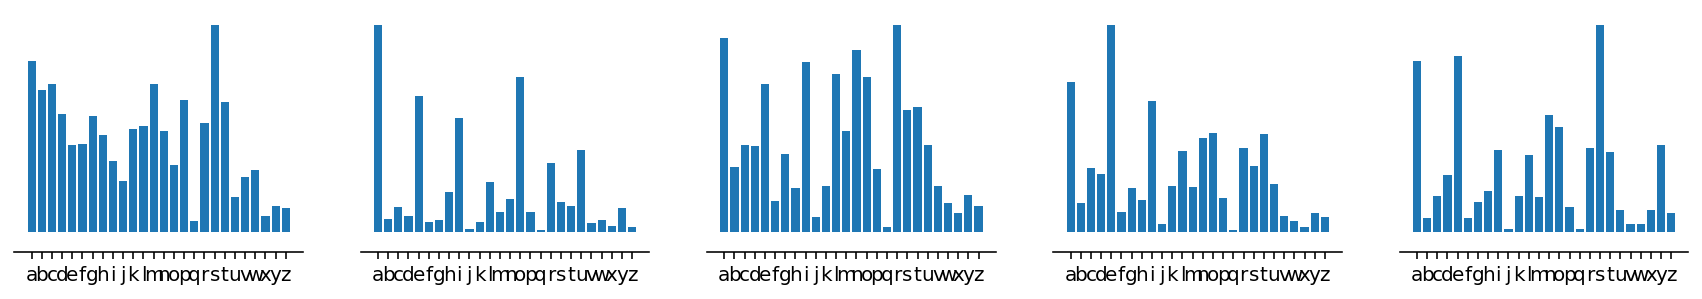

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(15, 2))
for i, ax in enumerate(axs):
    ax.bar(np.arange(len(ascii_lowercase)), letter_freq[i])
    ax.set_xticks(np.arange(len(ascii_lowercase)))
    ax.set_xticklabels(ascii_lowercase)
    ax.set_yticks([])
    sns.despine(ax=ax, left=True, offset=10)

Overall letter frequency.

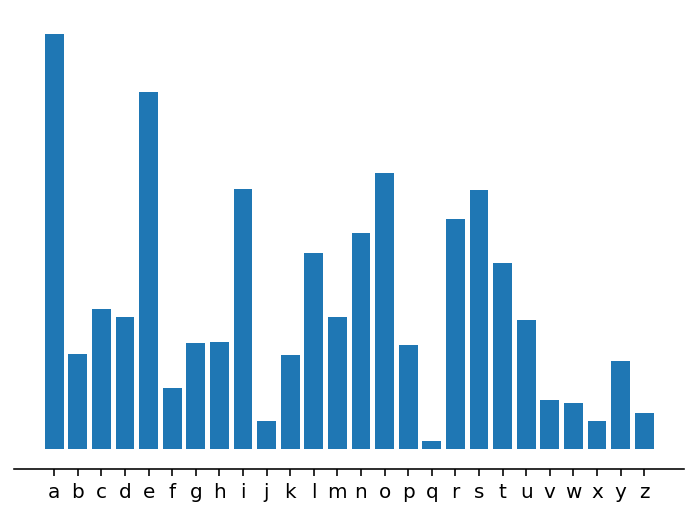

In [17]:
fig, ax = plt.subplots()
overall_freq = np.mean(letter_freq, axis=0)
ax.bar(np.arange(len(ascii_lowercase)), overall_freq)
ax.set_xticks(np.arange(len(ascii_lowercase)))
ax.set_xticklabels(ascii_lowercase)
ax.set_yticks([])
sns.despine(ax=ax, left=True, offset=10)

Most common letters by position:

In [18]:
[ascii_lowercase[np.argmax(letter_freq[_])] for _ in range(5)]

['s', 'a', 'r', 'e', 's']

10 most common letters overall:

In [19]:
{ascii_lowercase[_]: overall_freq[_] for _ in np.argsort(overall_freq)[::-1][:10]}

{'a': 0.10989407257155737,
 'e': 0.09469361179976461,
 'o': 0.07325770665865325,
 'i': 0.06886034107129442,
 's': 0.06852978739388475,
 'r': 0.06102722059449578,
 'n': 0.05733102947436956,
 'l': 0.0519620364109884,
 't': 0.04936268249317607,
 'c': 0.037172263541431896}

This suggests that `raise` would be a good starting word. It contains each of the most common letters at each position (though not matching that position); and it contains 5 out of the 6 most common letters overall.